**DSA0605 - Data Handling and Visualization for Advanced Programming**

***CAPSTONE PROJECT - NETFLIX USER ANALYSIS***

Gokul shanthosh M (192124203)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

DATASET USED : https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data

In [3]:
dataset_path = "/content/drive/MyDrive/Netflix Userbase.csv"
df_userbase = pd.read_csv(dataset_path)

# ***DATA ANALYSIS:***

In [4]:
df_userbase.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df_userbase.shape

(2500, 10)

In [6]:
df_userbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
df_userbase.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [8]:
df_userbase["User ID"].unique().shape[0]

2500

In [9]:
df_userbase.drop(columns={"User ID"}, inplace=True)

In [10]:
df_userbase.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [11]:
df_userbase["Subscription Type"].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [12]:
subscription_type_counts = df_userbase["Subscription Type"].value_counts()
names = ["Basic", "Standard", "Premium"]
fig = px.pie(values=subscription_type_counts, names=names)
fig.show()

In [13]:
df_userbase["Monthly Revenue"].unique()

array([10, 15, 12, 13, 11, 14])

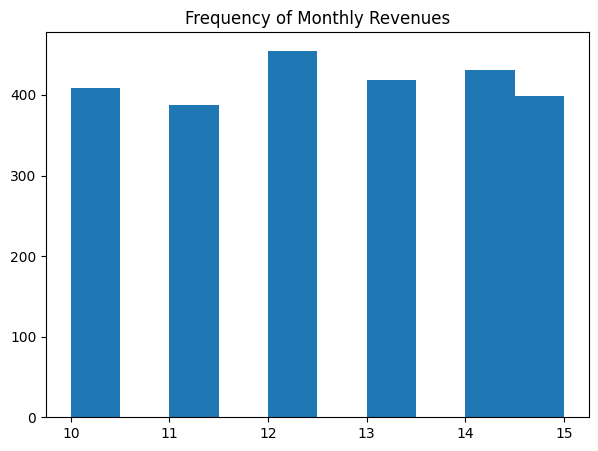

In [14]:
plt.figure(figsize=(7, 5))
plt.title("Frequency of Monthly Revenues")
plt.hist(df_userbase["Monthly Revenue"])
plt.show()

In [15]:
df_userbase["Join Date"].dtype

dtype('O')

In [16]:
df_userbase["Join Date"] = pd.to_datetime(df_userbase["Join Date"], format="%d-%m-%y")

In [17]:
print(df_userbase["Join Date"].dtype)
df_userbase.head()

datetime64[ns]


,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,2021-09-05,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,2022-07-10,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,2023-05-01,28-06-23,Germany,33,Male,Smartphone,1 Month


In [18]:
df_userbase["Join Month"] = df_userbase["Join Date"].dt.to_period("M")
monthly_join_counts = df_userbase.groupby("Join Month").size()
monthly_join_counts

Join Month
2021-09      3
2021-10      3
2021-11      4
2021-12      4
2022-01      8
2022-02      5
2022-03     13
2022-04     19
2022-05     40
2022-06    295
2022-07    481
2022-08    382
2022-09    367
2022-10    521
2022-11    295
2022-12     22
2023-01     12
2023-02      7
2023-03      6
2023-04      5
2023-05      5
2023-06      3
Freq: M, dtype: int64

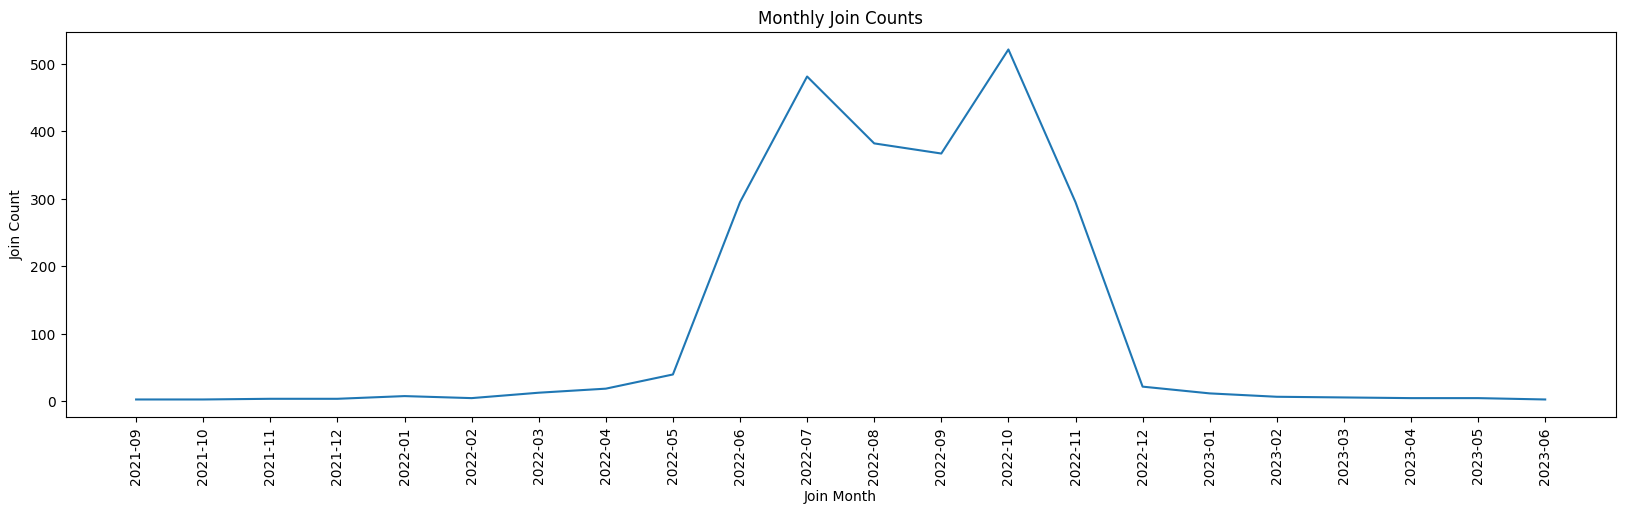

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_join_counts.index.astype(str), monthly_join_counts.values)
plt.xticks(rotation="vertical")
plt.xlabel("Join Month")
plt.ylabel("Join Count")
plt.title("Monthly Join Counts")
plt.show()

In [20]:
df_userbase["Last Payment Date"] = pd.to_datetime(df_userbase["Last Payment Date"], format="%d-%m-%y")

In [21]:
print(df_userbase["Last Payment Date"].dtype)
df_userbase.head()

datetime64[ns]


,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Month
0,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05


In [22]:
df_userbase["Last Payment Month"] = df_userbase["Last Payment Date"].dt.to_period("M")
monthly_join_counts = df_userbase.groupby("Last Payment Month").size()
monthly_join_counts

Last Payment Month
2023-06     866
2023-07    1634
Freq: M, dtype: int64

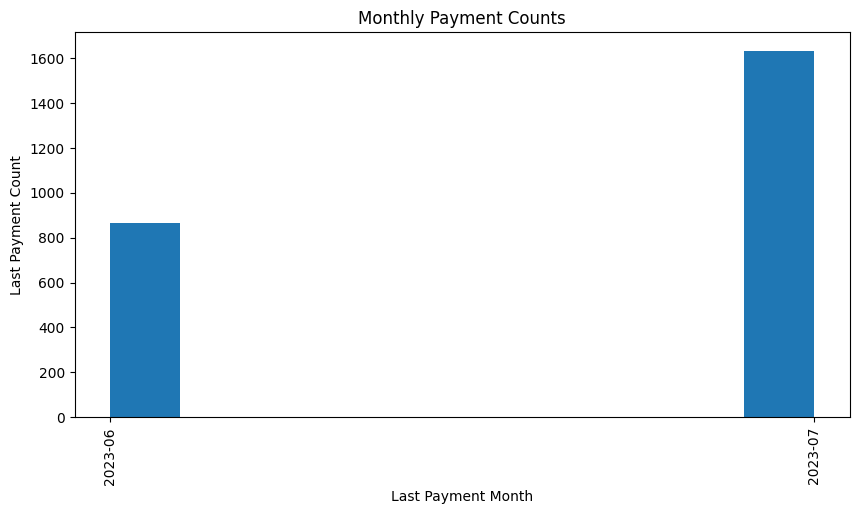

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df_userbase["Last Payment Month"].astype(str))
plt.xticks(rotation="vertical")
plt.xlabel("Last Payment Month")
plt.ylabel("Last Payment Count")
plt.title("Monthly Payment Counts")
plt.show()

In [24]:
df_userbase["Country"].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [25]:
country_counts = df_userbase["Country"].value_counts()
names = ['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy']
fig = px.pie(values=country_counts, names=names)
fig.show()

In [26]:
df_userbase["Age"].unique()

array([28, 35, 42, 51, 33, 29, 46, 39, 37, 44, 31, 45, 48, 27, 38, 36, 30,
       43, 32, 41, 26, 34, 49, 40, 47, 50])

In [27]:
df_userbase["Age"].value_counts()

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

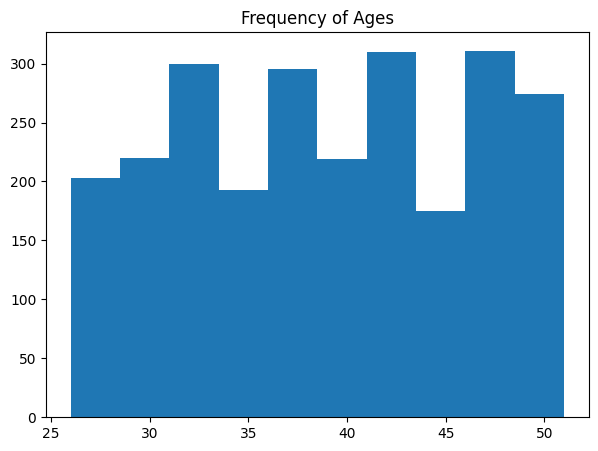

In [28]:
plt.figure(figsize=(7, 5))
plt.title("Frequency of Ages")
plt.hist(df_userbase["Age"])
plt.show()

In [29]:
gender_counts = df_userbase["Gender"].value_counts()
names = ['Male', 'Female']
fig = px.pie(values=gender_counts, names=names)
fig.show()

In [30]:
df_userbase["Device"].unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [31]:
device_counts = df_userbase["Device"].value_counts()
names = ['Smartphone', 'Tablet', 'Smart TV', 'Laptop']
fig = px.pie(values=device_counts, names=names)
fig.show()

In [32]:
df_userbase["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [33]:
df_userbase.drop(columns="Plan Duration", inplace=True)

In [34]:
df_userbase.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Join Month,Last Payment Month
0,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,2022-01,2023-06
1,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,2021-09,2023-06
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,2023-02,2023-06
3,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,2022-07,2023-06
4,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,2023-05,2023-06
